In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tasks=os.listdir("../src/data/4o")
n=10
models=['human', 'o1', '4o', 'copilot']
data={}

Started: Sorted_GCD_Pair_Queries
Started: N-Queens_II
Started: Construct_2D_Grid_Matching_Graph_Layout
Started: Number_of_Subarrays_With_AND_Value_of_K


/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Started: Count_Substrings_That_Satisfy_K-Constraint_II
Started: Length_of_the_Longest_Increasing_Path
Started: Find_Edges_in_Shortest_Paths
Started: Find_the_Median_of_the_Uniqueness_Array
Started: Minimum_Cost_for_Cutting_Cake_II
Started: Find_the_Sum_of_Subsequence_Powers
Started: Find_the_Occurrence_of_First_Almost_Equal_Substring
Started: Count_Substrings_That_Can_Be_Rearranged_to_Contain_a_String_II
Started: Merge_k_Sorted_Lists
Started: Sudoku_Solver
Started: Valid_Number
Started: Minimum_Window_Substring
Started: Scramble_String
Started: Minimum_Sum_of_Values_by_Dividing_Array
Started: Regular_Expression_Matching
Started: Maximize_the_Number_of_Partitions_After_Operations
Started: Maximum_Number_of_Moves_to_Kill_All_Pawns
Started: Substring_with_Concatenation_of_All_Words
Started: Reverse_Nodes_in_k-Group
Started: Permutation_Sequence
Started: Find_Subarray_With_Bitwise_OR_Closest_to_K
Started: Trapping_Rain_Water
Started: Count_Prefix_and_Suffix_Pairs_II
Started: Largest_Rectan

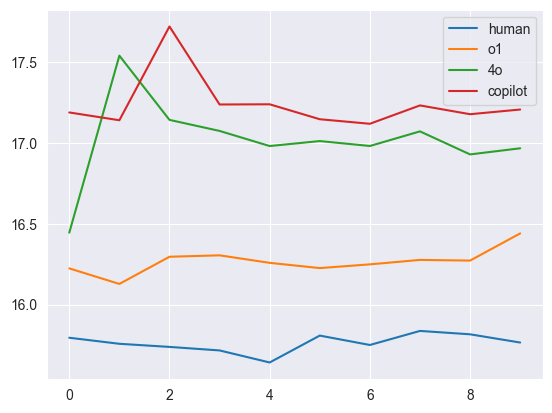

In [4]:
for task_name in tasks:
    if task_name==".DS_Store":
        continue
    print("Started: "+task_name)
    results={"human":{}, "o1":{}, "4o":{}, "copilot":{}}
    for model in models:
        results[model]={'Time':[], 'AveragePower':[], 'Energy':[]}
        for i in range(n):
            path="../src/measurements_powermetrics/Python/"+model+"/"+task_name+"/"+str(i+1)+".txt"
            file = open(path,'r')
            lines=file.read()
            power=re.findall(r"CPU Power: [0-9]+ mW", lines)
            time=re.findall(r"[0-9|\.]+ms elapsed", lines)
            
            all_power=[]
            for j in range(len(power)):
                all_power.append(int(power[j].split(":")[1].split()[0]))
            timeTemp=0
            for j in time:
                timeTemp+=float(j.split("ms")[0])
            results[model]['Time'].append(timeTemp/1000)
            results[model]['Energy'].append((np.mean(all_power).item()/1000)*(timeTemp/1000))
            #results[model]['AveragePower'].append(all_power)
            
        #avg_all_power=results[model]['AveragePower'][0]
        #for i in range(1, len(results[model]['AveragePower'])):
            #avg_all_power=avg_all_power[:len(results[model]['AveragePower'][i])]
            #avg_all_power=[x + y for x, y in zip(avg_all_power, results[model]['AveragePower'][i])]
        #for i in range(len(avg_all_power)):
            #avg_all_power[i]=avg_all_power[i]/n
        #results[model]['AveragePower']=avg_all_power
    data[task_name]=results
    plt.clf()
    #plt.plot(results["human"]["AveragePower"], label='human')
    #plt.plot(results["o1"]["AveragePower"], label='o1')
    #plt.plot(results["4o"]["AveragePower"], label='4o')
    #plt.plot(results["copilot"]["AveragePower"], label='copilot')
   # plt.legend(loc='upper right')
    #plt.savefig("Results/Python/PowerMetrics/AveragePower/"+task_name+'.png')
    plt.clf()
    plt.plot(results["human"]["Energy"], label='human')
    plt.plot(results["o1"]["Energy"], label='o1')
    plt.plot(results["4o"]["Energy"], label='4o')
    plt.plot(results["copilot"]["Energy"], label='copilot')
    plt.legend(loc='upper right')
    #plt.savefig("../Results/Python/PowerMetrics/Energy/"+task_name+'.png')

Started: Sorted_GCD_Pair_Queries
Started: N-Queens_II
Started: Construct_2D_Grid_Matching_Graph_Layout
Started: Number_of_Subarrays_With_AND_Value_of_K
Started: Count_Substrings_That_Satisfy_K-Constraint_II
Started: Length_of_the_Longest_Increasing_Path
Started: Find_Edges_in_Shortest_Paths
Started: Find_the_Median_of_the_Uniqueness_Array
Started: Minimum_Cost_for_Cutting_Cake_II
Started: Find_the_Sum_of_Subsequence_Powers
Started: Find_the_Occurrence_of_First_Almost_Equal_Substring
Started: Count_Substrings_That_Can_Be_Rearranged_to_Contain_a_String_II
Started: Merge_k_Sorted_Lists
Started: Sudoku_Solver
Started: Valid_Number
Started: Minimum_Window_Substring
Started: Scramble_String
Started: Minimum_Sum_of_Values_by_Dividing_Array
Started: Regular_Expression_Matching
Started: Maximize_the_Number_of_Partitions_After_Operations
Started: Maximum_Number_of_Moves_to_Kill_All_Pawns
Started: Substring_with_Concatenation_of_All_Words
Started: Reverse_Nodes_in_k-Group
Started: Permutation_Seq

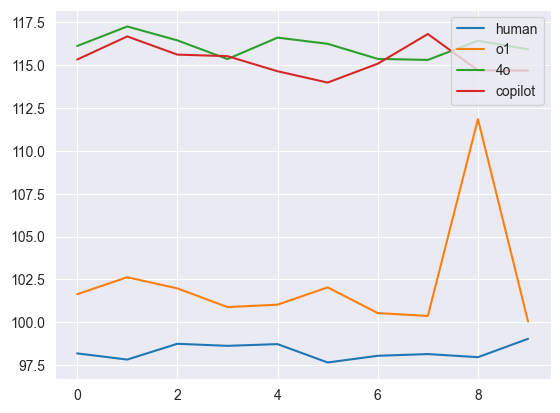

In [5]:
for task_name in tasks:
    if task_name==".DS_Store":
        continue
    print("Started: "+task_name)
    results={"human":{}, "o1":{}, "4o":{}, "copilot":{}}
    for model in models:
        results[model]={'Time':[], 'Energy':[]}
        for i in range(n):
            path=f"../src/measurements_perf/Python/{model}/{task_name}/{i+1}.txt"
            file = open(path,'r')
            lines=file.read()
            energy=re.findall(r"[0-9|\.]+,[0-9]* Joules", lines)
            time=re.findall(r"[0-9]+,[0-9]* seconds", lines)
            energy=float(energy[0].split("Joules")[0].replace(".","").replace(",", "."))
            time=float(time[0].split("seconds")[0].replace(",", "."))
            results[model]['Time'].append(time)
            results[model]['Energy'].append(energy)
        data[task_name][model]["Time Linux"]=results[model]['Time']
        data[task_name][model]["Energy Linux"]=results[model]['Energy']
    plt.clf()
    plt.plot(results["human"]["Energy"], label='human')
    plt.plot(results["o1"]["Energy"], label='o1')
    plt.plot(results["4o"]["Energy"], label='4o')
    plt.plot(results["copilot"]["Energy"], label='copilot')
    plt.legend(loc='upper right')
    #plt.savefig("../Results/Python/Perf/Energy/"+task_name+'.png')

In [6]:
import json

with open("../Results/resultsPython.json", "w") as outfile: 
    json.dump(data, outfile)

In [6]:
energy_data={}
for task in data.keys():
    energy_data[task]={"human": {"mean": 0, "std": 0}, "o1": {"mean": 0, "std": 0}, 
                       "4o": {"mean": 0, "std": 0}, "copilot": {"mean": 0, "std": 0}}
    for mode in data[task]:
        energy_data[task][mode]["mean"]=np.mean(data[task][mode]["Energy Linux"]).item()
        energy_data[task][mode]["std"]=np.std(data[task][mode]["Energy Linux"]).item()

In [8]:
energy_data_human=[energy_data[x]['human']["mean"] for x in energy_data.keys()]
energy_data_4o=[energy_data[x]['4o']["mean"] for x in energy_data.keys()]
energy_data_o1=[energy_data[x]['o1']["mean"] for x in energy_data.keys()]
energy_data_copilot=[energy_data[x]['copilot']["mean"] for x in energy_data.keys()]

Text(0.5, 1.0, 'Copilot Energy')

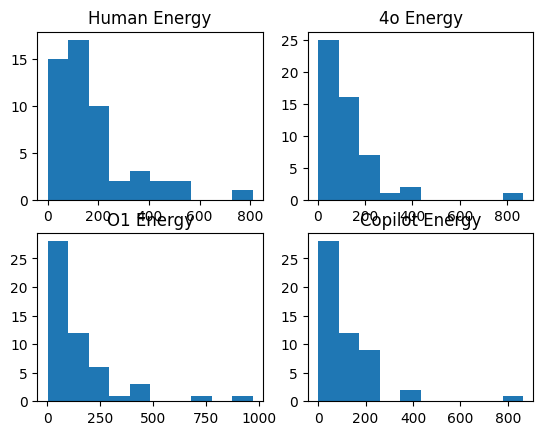

In [20]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
ax0.hist(energy_data_human)
ax0.set_title('Human Energy')
ax1.hist(energy_data_4o)
ax1.set_title('4o Energy')
ax2.hist(energy_data_o1)
ax2.set_title('O1 Energy')
ax3.hist(energy_data_copilot)
ax3.set_title('Copilot Energy')

Text(0.5, 1.0, 'Copilot Energy')

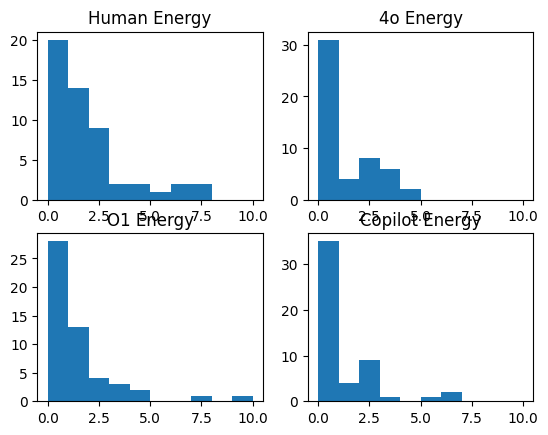

In [24]:
energy_data_human=[energy_data[x]['human']["std"] for x in energy_data.keys()]
energy_data_4o=[energy_data[x]['4o']["std"] for x in energy_data.keys()]
energy_data_o1=[energy_data[x]['o1']["std"] for x in energy_data.keys()]
energy_data_copilot=[energy_data[x]['copilot']["std"] for x in energy_data.keys()]

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
ax0.hist(energy_data_human, range=[0, 10])
ax0.set_title('Human Energy')
ax1.hist(energy_data_4o, range=[0, 10])
ax1.set_title('4o Energy')
ax2.hist(energy_data_o1, range=[0, 10])
ax2.set_title('O1 Energy')
ax3.hist(energy_data_copilot, range=[0, 10])
ax3.set_title('Copilot Energy')


In [31]:
from scipy.stats import mannwhitneyu
human_comparison={"4o": [], "o1":[], "copilot": []}
for task in data.keys():
    if np.mean(data[task]["human"]["Energy Linux"])>1 and np.mean(data[task]["4o"]["Energy Linux"])>1:
        U1, p = mannwhitneyu(data[task]["human"]["Energy Linux"], data[task]["4o"]["Energy Linux"], method="exact")
        if p<0.0001:
            human_comparison["4o"].append(task)
    if np.mean(data[task]["human"]["Energy Linux"])>1 and np.mean(data[task]["o1"]["Energy Linux"])>1:
        U1, p = mannwhitneyu(data[task]["human"]["Energy Linux"], data[task]["o1"]["Energy Linux"], method="exact")
        if p<0.0001:
            human_comparison["o1"].append(task)
    if np.mean(data[task]["human"]["Energy Linux"])>1 and np.mean(data[task]["copilot"]["Energy Linux"])>1:
        U1, p = mannwhitneyu(data[task]["human"]["Energy Linux"], data[task]["copilot"]["Energy Linux"], method="exact")
        if p<0.0001:
            human_comparison["copilot"].append(task)

In [33]:
len(set(human_comparison["4o"]).union(human_comparison["o1"]).union(human_comparison["copilot"]))

42